<a href="https://colab.research.google.com/github/davidwan08/Data-Visualization-Exercise-Cereal-/blob/main/David_Wan_Data_Visualization_Exercise_(Practice).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
# Assignment: Data Visualization Exercise (Practice)

# Name: David Wan

# Date: 04/11/2022

Makeover Monday offers a weekly challenge to re-create or improve data visualizations. Your task is to choose one of the data visualizations to re-create or improve!

To do this:

1. Choose a data set from the Data Sets list. You can choose a recent data set or one from a previous year - as long as it interests you!
2. Download the data that you chose.
3. Use Python to create a visually appealing, informative visualization using the data you selected.

You also need to put your work for this assignment on GitHub, so everyone can see the awesome visualization you created!

To do this:

1. Create a new GitHub repository with an informative name for your visualization or data. (Note: here are instructions on how to do this if you are unsure - make sure to check the box marked "Initialize this repository with a README.")
2. Add your code to the GitHub repo you created. You can do this in Google Colab by selecting File > "Save a Copy In GitHub"
3. Edit the README to create an informative overview of the exercise that explains the purpose of the task/visualization, the data, and what the visualization you made shows/tells you. You may even want to include a static image of your final visualization in the README as well! (Note: README's are markdown files. Here is a cheatsheet of markdown syntax.) Try to make this as informative and professional as possible, as this is the first thing people will see when they come to your GitHub repo!

Once you are done, submit a link to your GitHub repo to turn in this assignment.

In [76]:
# Mount data
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# Import libraries
# Note this notebook is also importing the seaborn library
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [78]:
# Load the dataset
# Keep in mind that the filename will likely be different on your computer (especially later in course)
filename = '/content/drive/My Drive/Coding Dojo/Week 4/cereal.csv'
df = pd.read_csv(filename)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [79]:
# Lets get information about this dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


- I would like to examine the sugar content and its effect on the cereal rating.

In [80]:
# Let's examine the unique sugar content values.
df['sugars'].unique()

array([ 6,  8,  5,  0, 10, 14, 12,  1,  9,  7, 13,  3,  2, 11, 15,  4, -1])

In [81]:
# Create array for cereal ratings with respect to sugar content.
sugarcontentRating = df.groupby(['sugars'])['rating'].mean()
sugarcontentRating

sugars
-1     50.828392
 0     71.073015
 1     50.764999
 2     49.168365
 3     45.921779
 4     45.811716
 5     53.702213
 6     49.189423
 7     44.971610
 8     36.259609
 9     27.505853
 10    33.625169
 11    30.665261
 12    30.944845
 13    26.913473
 14    33.202491
 15    33.241249
Name: rating, dtype: float64

In [82]:
# Looks like there is a typo with the sugars list. Lets fix that.
# We will create a filter for the negative sugar value.
negativesugar_filter = df['sugars'] < 0
negativesugar_filter.sum()

1

In [83]:
# Let's take a look at all the datapoints with negative sugars values.
df.loc[negativesugar_filter, :]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
57,Quaker Oatmeal,Q,H,100,5,2,0,2.7,-1.0,-1,110,0,1,1.0,0.67,50.828392


In [84]:
# Let's change that number to a positive value, based on the rating of that entry.
df.loc[negativesugar_filter, 'sugars'] = 1
df['sugars']

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64

In [85]:
# Now let's recreate array for cereal ratings with respect to sugar content.
sugarcontentRating = df.groupby(['sugars'])['rating'].mean()
sugarcontentRating

sugars
0     71.073015
1     50.796695
2     49.168365
3     45.921779
4     45.811716
5     53.702213
6     49.189423
7     44.971610
8     36.259609
9     27.505853
10    33.625169
11    30.665261
12    30.944845
13    26.913473
14    33.202491
15    33.241249
Name: rating, dtype: float64

In [86]:
# Can convert to NumPy array or list
sugar = np.array(sugarcontentRating.index)
sugar

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])

In [87]:
sugarrating = np.array(sugarcontentRating.values)
sugarrating

array([71.07301514, 50.7966955 , 49.16836467, 45.92177892, 45.811716  ,
       53.7022128 , 49.18942343, 44.97161025, 36.2596086 , 27.50585325,
       33.6251688 , 30.6652614 , 30.94484457, 26.913473  , 33.202491  ,
       33.241249  ])

In [88]:
# Lets also examine how fiber content affects cereal ratings.
fibercontentRating = df.groupby(['fiber'])['rating'].mean()
fibercontentRating

fiber
0.0     33.686017
1.0     40.753876
1.5     30.344200
2.0     42.511421
2.5     39.703400
2.7     50.828392
3.0     50.664670
4.0     48.158690
5.0     43.626387
6.0     37.840594
9.0     59.425505
10.0    68.402973
14.0    93.704912
Name: rating, dtype: float64

In [89]:
# Can convert to NumPy array or list
fiber = np.array(fibercontentRating.index)
fiber

array([ 0. ,  1. ,  1.5,  2. ,  2.5,  2.7,  3. ,  4. ,  5. ,  6. ,  9. ,
       10. , 14. ])

In [90]:
fiberrating = np.array(fibercontentRating.values)
fiberrating

array([33.68601705, 40.75387625, 30.34420033, 42.5114211 , 39.7034    ,
       50.828392  , 50.6646696 , 48.15868975, 43.62638725, 37.840594  ,
       59.425505  , 68.402973  , 93.704912  ])

Text(0.5, 1.0, 'Fiber Content (g) on Cereal Rating')

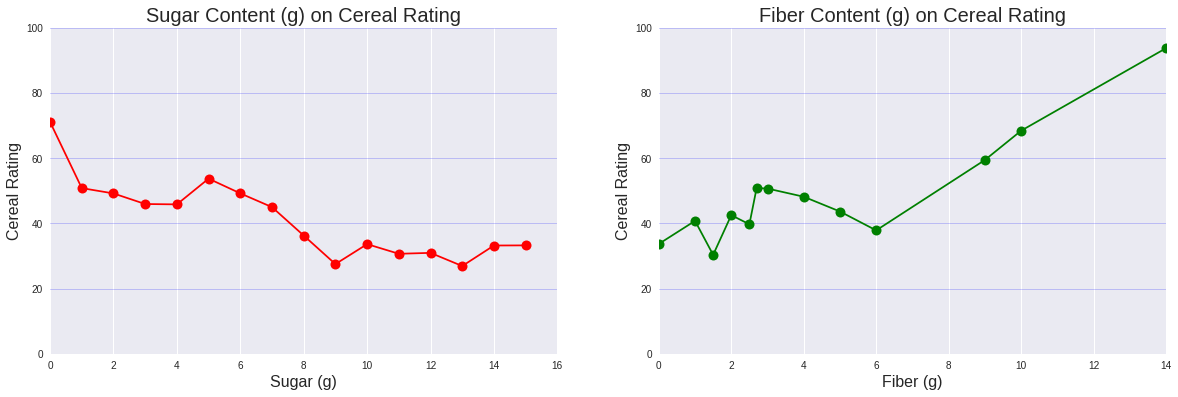

In [104]:
# I will use Matlab-style to perform the visualization process for cereal ratings.
plt.style.use('seaborn')
plt.figure(figsize=(20,6))

# Subplot 1: Sugar
plt.subplot(1, 2, 1);
plt.plot(sugar, sugarrating, c= 'red', marker = '.', markersize = 20)
plt.xlim(left=0,right=16)
plt.ylim(bottom=0,top=100)
plt.grid(axis = 'y',
         c = 'b', 
         alpha = .2,
         linestyle = '-')
plt.xlabel('Sugar (g)', fontsize = 16)
plt.ylabel('Cereal Rating', fontsize = 16)
plt.title('Sugar Content (g) on Cereal Rating', fontsize = 20)

# Subplot 2: Fiber
plt.subplot(1, 2, 2);
plt.plot(fiber, fiberrating, c= 'green', marker = '.', markersize = 20)
plt.xlim(left=0,right=14)
plt.ylim(bottom=0,top=100)
plt.grid(axis = 'y',
         c = 'b', 
         alpha = .2,
         linestyle = '-')
plt.xlabel('Fiber (g)', fontsize = 16)
plt.ylabel('Cereal Rating', fontsize = 16)
plt.title('Fiber Content (g) on Cereal Rating', fontsize = 20)

- I have created 2 visualizations of how both sugar and fiber contents affected the ratings of cereals.
- Contrary to the belief that sweeter cereals are more enjoyable to eat, the cereal rating seems to have a downward trend as the cereal sugar content increases.
- Also contrary to the belief that higher fiber cereals are less enjoyable to eat, the cereal rating seems to have an upward trend as the cereal fiber content increases.
- I would imagine that cereal ratings are completely up to user preference, but if I were to examine cereal preferences of children as compared to adults, the rating trends would most likely be reversed. :)
- Very fascinating dataset in regards to cereal ratings!